# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

In [1]:
import pandas as pd
import numpy as np

In [2]:
black_friday = pd.read_csv("black_friday.csv")

## Inicie sua análise a partir daqui

In [3]:
# importando seaborn para análises gráficas
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# visualizando as 5 primerias entradas do DataFrame
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
print('Dimensões do DataFrame: ')
print('Linhas: {}'.format(black_friday.shape[0]))
print('Colunas: {}'.format(black_friday.shape[1]))

Dimensões do DataFrame: 
Linhas: 537577
Colunas: 12


In [6]:
# informações sobre o DataFrame
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
# verificando a existência de valores nulos (NaN)
black_friday.isnull().values.any()

True

In [8]:
# quantidade de valores nulos por coluna (NaN)
black_friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
print('Porcentagem de valores nulos: ')
((black_friday.isnull().sum() / len(black_friday)) * 100).sort_values(ascending=False)

Porcentagem de valores nulos: 


Product_Category_3            69.441029
Product_Category_2            31.062713
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

## Análise Exploratória

In [10]:
# resumo estatístico
black_friday.describe().round(3)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.000,537577.000,537577.000,537577.000,370591.000,164278.000,537577.000
mean,1002991.847,8.083,0.409,5.296,9.842,12.670,9333.860
std,1714.393,6.524,0.492,3.751,5.087,4.124,4981.022
min,1000001.000,0.000,0.000,1.000,2.000,3.000,185.000
25%,1001495.000,2.000,0.000,1.000,5.000,9.000,5866.000
50%,1003031.000,7.000,0.000,5.000,9.000,14.000,8062.000
75%,1004417.000,14.000,1.000,8.000,15.000,16.000,12073.000
max,1006040.000,20.000,1.000,18.000,18.000,18.000,23961.000


In [11]:
# quantidade total de compradores
black_friday['User_ID'].nunique()

5891

In [12]:
# quantidade de produtos
black_friday['Product_ID'].nunique()

3623

In [13]:
# quantidade de produtos vendidos por categoria
print('Product_Category_1: {}'.format(black_friday['Product_Category_1'].sum()))
print('Product_Category_2: {}'.format(black_friday['Product_Category_2'].sum()))
print('Product_Category_3: {}'.format(black_friday['Product_Category_3'].sum()))

Product_Category_1: 2846764
Product_Category_2: 3647410.0
Product_Category_3: 2081376.0


In [14]:
# valor total de compras
black_friday['Purchase'].sum()

5017668378

[Compras por Gênero]
M    405380
F    132197
Name: Gender, dtype: int64

[Compras por Categoria Cidade]
B    226493
C    166446
A    144638
Name: City_Category, dtype: int64


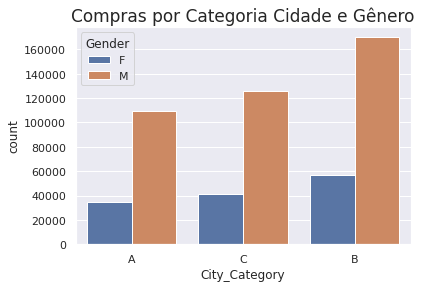

In [15]:
print('[Compras por Gênero]\n{}\n'.format(black_friday['Gender'].value_counts()))
print('[Compras por Categoria Cidade]\n{}'.format(black_friday['City_Category'].value_counts()))

ax = sns.countplot(x='City_Category', data=black_friday, hue='Gender')
ax.set_title('Compras por Categoria Cidade e Gênero', fontsize= 17);

[Compras por Faixa de Idade]
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64


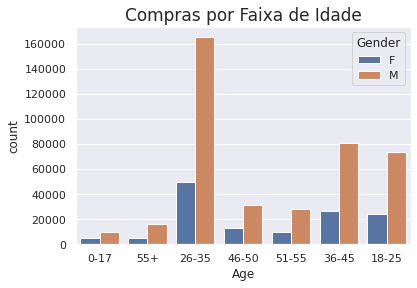

In [16]:
print('[Compras por Faixa de Idade]\n{}'.format(black_friday['Age'].value_counts()))

ax = sns.countplot(x='Age', data=black_friday, hue='Gender')
ax.set_title('Compras por Faixa de Idade', fontsize=17);

[Compras por Estao Civil]
0    317817
1    219760
Name: Marital_Status, dtype: int64


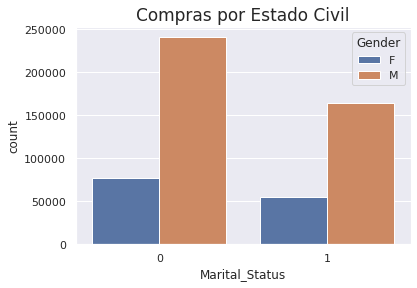

In [17]:
print('[Compras por Estao Civil]\n{}'.format(black_friday['Marital_Status'].value_counts()))

ax = sns.countplot(x='Marital_Status', data=black_friday, hue='Gender')
ax.set_title('Compras por Estado Civil', fontsize=17);

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [18]:
def q1():
    return black_friday.shape
q1()

(537577, 12)

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [19]:
# faixas de idade
black_friday['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
# tipos de gênero
black_friday['Gender'].unique()

array(['F', 'M'], dtype=object)

In [21]:
black_friday.query('Gender == "F" & Age == "26-35"')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
47,1000011,P00192642,F,26-35,1,C,1,0,8,17.0,NaN,6171
48,1000011,P00110842,F,26-35,1,C,1,0,1,2.0,5.0,19327
49,1000011,P00189642,F,26-35,1,C,1,0,8,13.0,NaN,8027
124,1000024,P00346642,F,26-35,7,A,3,1,8,NaN,NaN,2230
125,1000024,P00205642,F,26-35,7,A,3,1,5,8.0,NaN,6940
...,...,...,...,...,...,...,...,...,...,...,...,...
537092,1004659,P00196542,F,26-35,14,C,0,0,5,8.0,14.0,5336
537288,1004692,P00176242,F,26-35,7,C,3,0,8,NaN,NaN,6197
537289,1004692,P00015642,F,26-35,7,C,3,0,8,16.0,17.0,6187
537290,1004692,P00069142,F,26-35,7,C,3,0,7,NaN,NaN,16335


In [22]:
def q2():
    return black_friday.query('Gender == "F" & Age == "26-35"').count()['Gender']
q2()

49348

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [23]:
def q3():
    return black_friday['User_ID'].nunique()
q3()

5891

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [24]:
black_friday.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [25]:
def q4():
    return black_friday.dtypes.nunique()
q4()

3

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [26]:
def q5():
    return (black_friday.shape[0] - black_friday.dropna().shape[0]) / black_friday.shape[0]
q5()

0.6944102891306734

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [27]:
black_friday.isnull().sum().sort_values(ascending=False)

Product_Category_3            373299
Product_Category_2            166986
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [28]:
def q6():
    return black_friday.isnull().sum().sort_values(ascending=False)[0]
q6()

373299

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [29]:
# podemos obter a resposta de duas maneiras
# maneira 1
black_friday['Product_Category_3'].value_counts()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

In [30]:
# maneira 2
black_friday['Product_Category_3'].mode()

0    16.0
dtype: float64

In [31]:
def q7():
    return black_friday['Product_Category_3'].value_counts().index[0]
q7()

16.0

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [32]:
# A normalização tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1
# Podemos normalizar os valores aplicando a seguinte fórmula:

![image.png](attachment:image.png)

In [33]:
# Numerador
(black_friday['Purchase'] - black_friday['Purchase'].min())

0          8185
1         15015
2          1237
3           872
4          7784
          ...  
537572    11479
537573    19011
537574     7858
537575     6987
537576     6690
Name: Purchase, Length: 537577, dtype: int64

In [34]:
# Denominador
(black_friday['Purchase'].max() - black_friday['Purchase'].min())

23776

In [35]:
# Calculando a normalização
normalized = (black_friday['Purchase'] - black_friday['Purchase'].min()) / (black_friday['Purchase'].max() - black_friday['Purchase'].min())

In [36]:
def q8():
    normalized = (black_friday['Purchase'] - black_friday['Purchase'].min()) / (black_friday['Purchase'].max() - black_friday['Purchase'].min())
    return normalized.mean()
q8()

0.38479390362696736

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [37]:
# Padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1
# Podemos padronizar os valores aplicando a seguinte fórmula:

![image.png](attachment:image.png)

In [38]:
# Numerador
(black_friday['Purchase'] - black_friday['Purchase'].mean())

0         -963.859853
1         5866.140147
2        -7911.859853
3        -8276.859853
4        -1364.859853
             ...     
537572    2330.140147
537573    9862.140147
537574   -1290.859853
537575   -2161.859853
537576   -2458.859853
Name: Purchase, Length: 537577, dtype: float64

In [39]:
# Denominador
black_friday['Purchase'].std()

4981.022132656483

In [40]:
# Calculando a padronização
standardized = (black_friday['Purchase'] - black_friday['Purchase'].mean()) / black_friday['Purchase'].std()

In [41]:
standardized.between(-1, 1).sum()

348631

In [42]:
def q9():
    return standardized.between(-1, 1).sum()
q9()

348631

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [43]:
black_friday.query("Product_Category_2 == 'NaN' & Product_Category_3 != 'NaN'")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [44]:
black_friday.query("Product_Category_2 == 'NaN' & Product_Category_3 == 'NaN'")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957
...,...,...,...,...,...,...,...,...,...,...,...,...
537563,1004736,P00154642,M,18-25,20,A,1,1,8,NaN,NaN,6074
537565,1004736,P00051142,M,18-25,20,A,1,1,8,NaN,NaN,7934
537566,1004736,P00048742,M,18-25,20,A,1,1,5,NaN,NaN,5350
537568,1004736,P00250642,M,18-25,20,A,1,1,11,NaN,NaN,5930


In [45]:
def q10():
    return black_friday.query("Product_Category_2 == 'NaN' & Product_Category_3 == 'NaN'").shape[0] > 0
q10()

True